# Time Series Analysis
 
AirPassengers is a dataset with the number of passengers from international airlines between 1949 to 1960.

In [2]:
### create a time-series dataset based on the data

dts <- ts(AirPassengers, start=c(1949,1), end=c(1960,12), frequency=12)

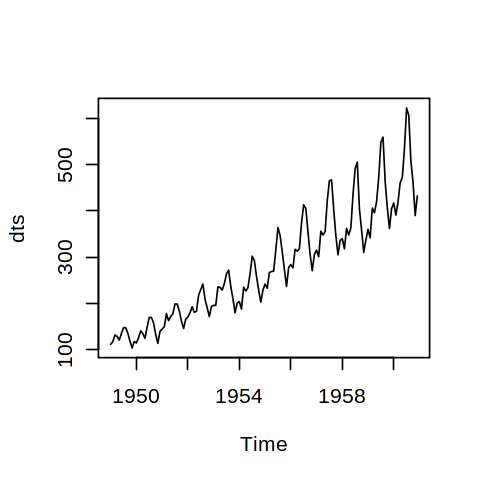

In [3]:
## change the size of the graphs
options(repr.plot.width = 4, repr.plot.height = 4)
plot(dts)

## Time Series Decomposition

In [4]:
stationary_dts <- decompose(dts)

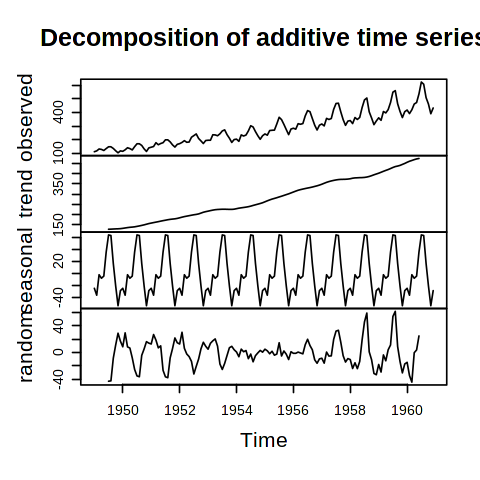

In [5]:
plot(stationary_dts)

### Predicting the future tendency using ARIMA regression
 
To be able to run the ARIMA model, we have to determine three parameters: p, d ,q. They derivative parts of the AR-I-MA. The p part is obtined by examining the autocorrelation of the series. We need to determine the correct time lag to define the parameters of the model by running the autocorrelation (acf) and partial autocorrelation (pacf) functions.


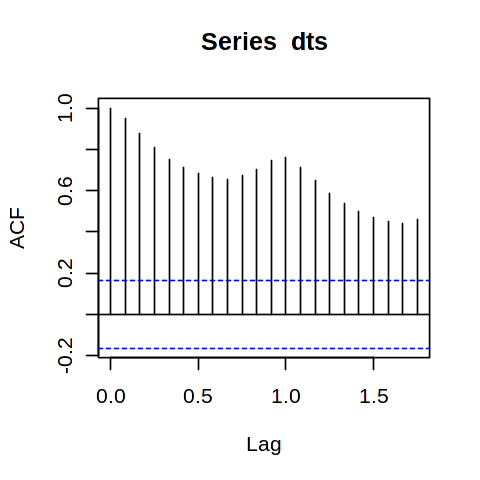

In [6]:
acf(dts)

On our data, acf doesn't show us a useful value for our parameters, as all the data is over the confidence values (blue dotted lines).

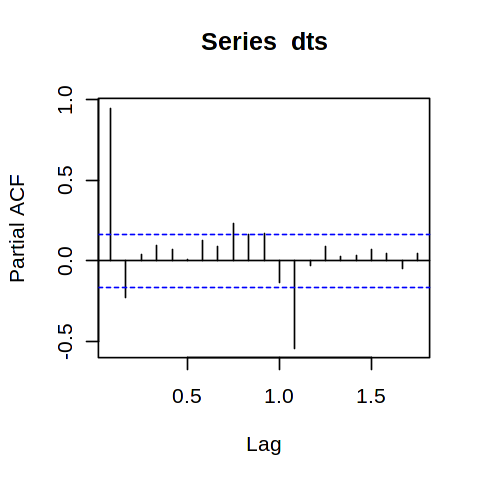

In [8]:
pacf(dts)

On the other hand, the pacf function show that the first lag is positive and outside than the confidence levels (blue dotted line). The second lag was negative and was outside the confidence levels. The third and following lags were lower and inside the confidence levels. Thus, the value that define our time lag for the model is 2.
 
The d parameter is defined by the integrative part of the model and is defined by the difference subtracting its current and previous values d times.
 
The q part of the model is determined by the moving average (MA) of the model. 

We will begin assumming the d and q as zero.
 
Finally, having the required parameters, we proced to run the arima model as:
<code> arima(data, order=c(p,d,q)) </code>

In [12]:
dts_arima <- arima(dts, order=c(2,0,0))
dts_arima


Call:
arima(x = dts, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      1.2831  -0.3322   280.4696
s.e.  0.0786   0.0792    49.4423

sigma^2 estimated as 995.9:  log likelihood = -702.82,  aic = 1413.64

The ARIMA model gives us the formula for calculating the next value in the data series. The values of the betas are provided by the ar1 and ar2 variables. the formula is like most of the regressions we have learned:

<code> Xt = (1.2831 * Xt-1) + (-0.3322 * Xt-2) + 280.4696 </code>



## Forecasting using the ARIMA predictive model

In [13]:
library(forecast)
dts_fit <- forecast(dts_arima)
dts_fit

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff



         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
Jan 1961       438.5173 398.0744 478.9602 376.66528 500.3693
Feb 1961       432.9272 367.1351 498.7192 332.30692 533.5474
Mar 1961       423.5892 339.0097 508.1686 294.23610 552.9423
Apr 1961       413.4643 314.7185 512.2101 262.44564 564.4830
May 1961       403.5748 293.8972 513.2524 235.83742 571.3123
Jun 1961       394.2488 275.9556 512.5421 213.33491 575.1628
Jul 1961       385.5677 260.3676 510.7678 194.09063 577.0447
Aug 1961       377.5267 246.7165 508.3369 177.46972 577.5836
Sep 1961       370.0929 234.6801 505.5057 162.99691 577.1889
Oct 1961       363.2256 224.0079 502.4434 150.31049 576.1408
Nov 1961       356.8835 214.5017 499.2653 139.12937 574.6377
Dec 1961       351.0271 206.0021 496.0521 129.23046 572.8237
Jan 1962       345.6194 198.3782 492.8605 120.43343 570.8053
Feb 1962       340.6260 191.5214 489.7306 112.59021 568.6619
Mar 1962       336.0154 185.3402 486.6906 105.57763 566.4532
Apr 1962       331.7582 

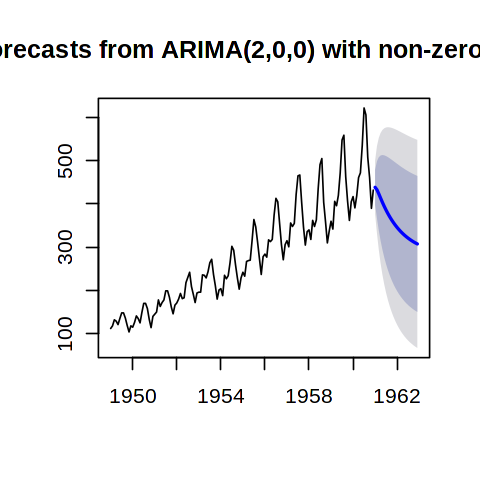

In [14]:
plot(dts_fit)

For finding the optimal ARIMA model we have to change the values of d and q and compare the models using the AIC statistic (the less the best).
 
R have a function that search for the best model automatically: <i> auto.arima </i>
 


In [20]:
dts_autoarima <- auto.arima(dts)
dts_autoarima

Series: dts 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 estimated as 132.3:  log likelihood=-504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

In [21]:
dts_autoforecast <- forecast(dts_autoarima)
dts_autoforecast

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       445.6349 430.8903 460.3795 423.0851 468.1847
Feb 1961       420.3950 403.0907 437.6993 393.9304 446.8596
Mar 1961       449.1983 429.7726 468.6241 419.4892 478.9074
Apr 1961       491.8399 471.0270 512.6529 460.0092 523.6707
May 1961       503.3945 481.5559 525.2330 469.9953 536.7937
Jun 1961       566.8625 544.2637 589.4612 532.3007 601.4242
Jul 1961       654.2602 631.0820 677.4384 618.8122 689.7081
Aug 1961       638.5975 614.9704 662.2246 602.4630 674.7320
Sep 1961       540.8837 516.9028 564.8647 504.2081 577.5594
Oct 1961       494.1266 469.8624 518.3909 457.0177 531.2356
Nov 1961       423.3327 398.8381 447.8273 385.8715 460.7940
Dec 1961       465.5076 440.8229 490.1923 427.7556 503.2596
Jan 1962       479.2909 448.9986 509.5831 432.9629 525.6189
Feb 1962       454.1769 421.7184 486.6353 404.5359 503.8178
Mar 1962       483.0870 448.7343 517.4397 430.5492 535.6249
Apr 1962       525.8193 490.1122 561.526

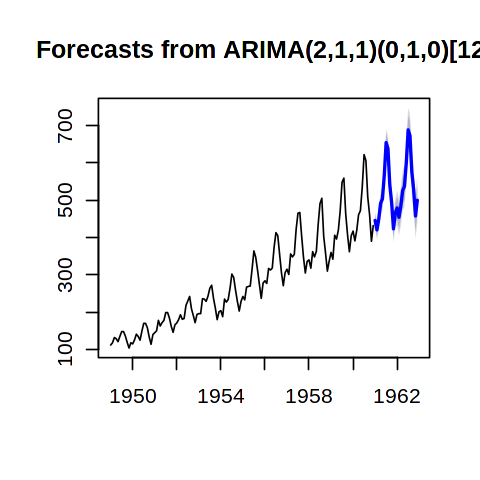

In [22]:
plot(dts_autoforecast)